# Example: Delivery fleet data

As an example, we'll show how the $K$-means algorithm works with a sample dataset of delivery fleet driver data.  For the sake of simplicity, we'll only be looking at two driver features: mean distance driven per day and the mean percentage of time a driver was $>5$ mph over the speed limit.  In general, this algorithm can be used for any number of features, so long as the number of data samples is much greater than the number of features.

In [93]:
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# imports
import matplotlib.pyplot as plt, numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (12, 6)

In [94]:
df = pd.read_csv("driver-data.csv", index_col="id")
df.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 3423311935 to 3423311533
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_dist_day         4000 non-null   float64
 1   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 93.8 KB


In [96]:
df.describe()

,mean_dist_day,mean_over_speed_perc
count,4000.000000,4000.000000
mean,76.041522,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


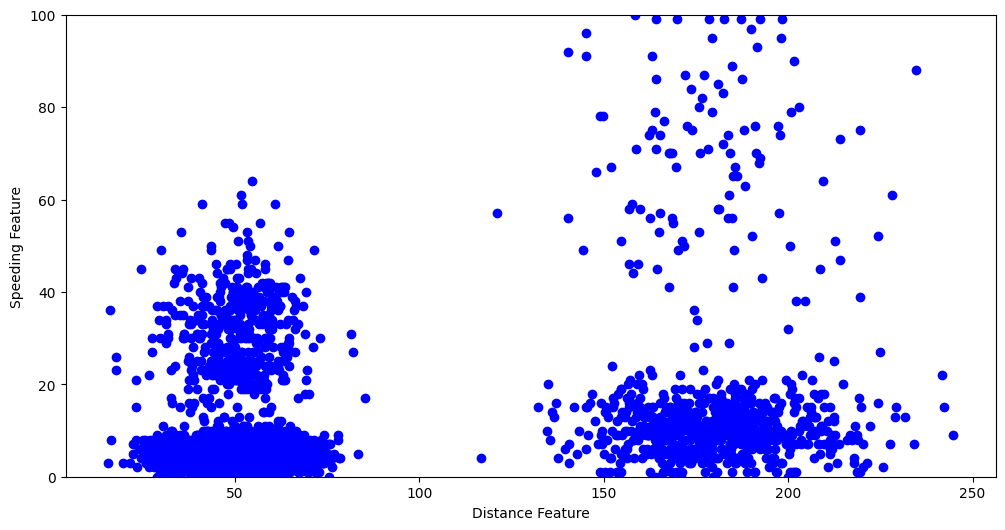

In [77]:
plt.figure()
plt.plot(df['mean_dist_day'],df['mean_over_speed_perc'],'bo')
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.ylim(0,100)
plt.show()

The chart shows the results. Visually, you can see there seems to be two groups based on the distance feature. 

Using domain knowledge of the dataset, we can infer that Group 1 is urban(densely populated) drivers and Group 2 is rural(less populated) drivers.

In [91]:
# Feature selection (assuming all columns except 'id' are relevant)
features = df.select_dtypes(include=[np.number])  # Select only numerical columns

print(features)
# Scale the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

            mean_dist_day  mean_over_speed_perc  Cluster_With_Scaling
id                                                                   
3423311935          71.24                    28                     2
3423313212          52.53                    25                     2
3423313724          64.54                    27                     2
3423311373          55.69                    22                     2
3423310999          54.58                    25                     2
...                   ...                   ...                   ...
3423310685         160.04                    10                     1
3423312600         176.17                     5                     1
3423312921         170.91                    12                     1
3423313630         176.14                     5                     1
3423311533         168.03                     9                     1

[4000 rows x 3 columns]


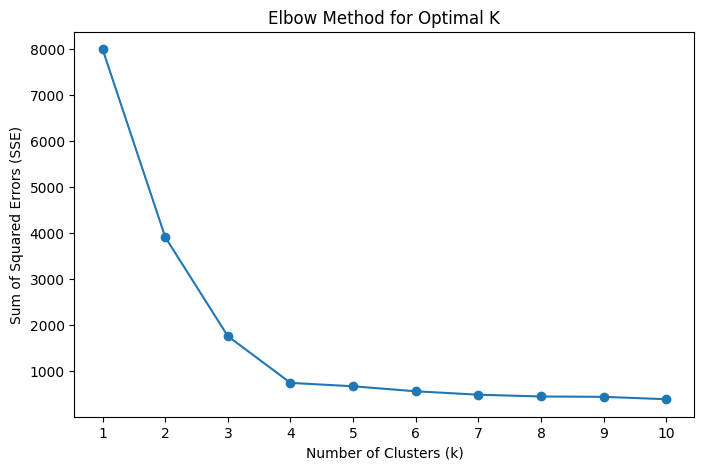

In [79]:

# Elbow method to determine the optimal K
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal K")
plt.xticks(range(1, 11))
plt.show()

In [80]:
# We see from above that K=4, is the optimal

# Apply KMeans clustering (K=4) with scaling
kmeans_with_scaling = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_with_scaling = kmeans_with_scaling.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
df["Cluster_With_Scaling"] = clusters_with_scaling

# Print cluster centers (scaled)
print("Cluster Centers (With Scaling - Standardized Features):")
print(kmeans_with_scaling.cluster_centers_)

Cluster Centers (With Scaling - Standardized Features):
[[-0.48678423 -0.40249736]
 [ 1.95263225 -0.0139714 ]
 [-0.47952334  1.57909169]
 [ 1.90400473  4.34582367]]


In [81]:
kmeans_with_scaling.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [82]:
import numpy as np

In [83]:
unique, counts = np.unique(kmeans_with_scaling.labels_, return_counts=True)

In [84]:
# Get count on how many belong to each clusters
dict_data = dict(zip(unique, counts))
dict_data

{np.int32(0): np.int64(2774),
 np.int32(1): np.int64(695),
 np.int32(2): np.int64(427),
 np.int32(3): np.int64(104)}

In [85]:
import seaborn as sns

In [86]:
# df["cluster"] = kmeans_with_scaling.labels_

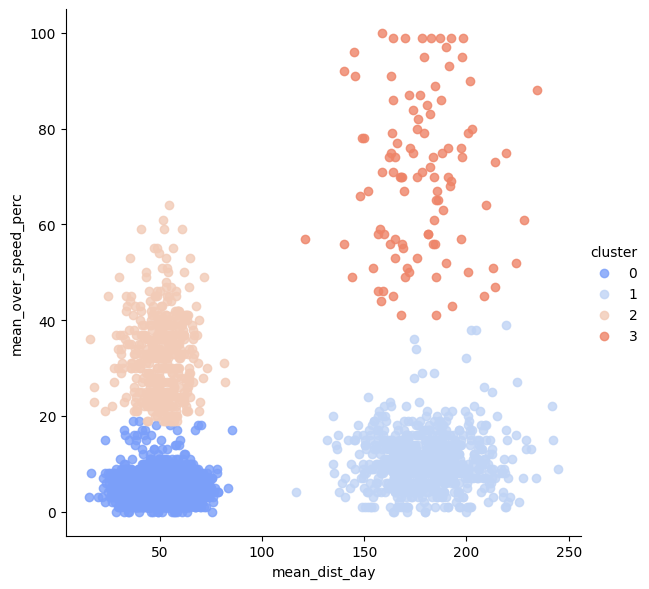

In [87]:
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=data, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg=False)

In [88]:
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans_with_scaling.inertia_

739.1534508645582

In [89]:
kmeans_with_scaling.score

<bound method _BaseKMeans.score of KMeans(n_clusters=4, n_init=10, random_state=42)>

In [90]:
df

,mean_dist_day,mean_over_speed_perc,Cluster_With_Scaling
id,,,
3423311935,71.24,28,2
3423313212,52.53,25,2
3423313724,64.54,27,2
3423311373,55.69,22,2
3423310999,54.58,25,2
...,...,...,...
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1
